In [56]:
import pandas as pd
import seaborn as sns
#import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
#from plotnine import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
import numpy as np
import sys, os, gc, traceback
from sklearn.preprocessing import LabelEncoder
#! pip install missingno
import missingno as msno
#! pip install impyute
from impyute.imputation.cs import mice
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import xgboost
import time
from sklearn.metrics import precision_recall_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import plotly.figure_factory as ff
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
import pickle
from sklearn.model_selection import RandomizedSearchCV, cross_validate, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score,fbeta_score, roc_auc_score, accuracy_score, classification_report


In [57]:
class PreProcessor():
    def __init__(self, parent=None):
        pass
    def getData():
        # get the current directory

        folderName = os.getcwd()
        fileName = '\Dataset\LoanApplyData-bank.csv'

        # Concatenate directory with files
        dataFilePath = folderName + fileName
        print(dataFilePath)
        # Use concatenated string to read .csv file using panda data frame

        loanData = pd.read_csv(dataFilePath)
        #print(loanData.head())
        print(loanData.dtypes)

        return loanData

    # Identify categorical variables
    def get_categorical_columns(data):
        numeric_columns = data._get_numeric_data().columns
        allColumns = data.columns
        cat_columns = list(set(allColumns) - set(numeric_columns))

        #print(cat_columns)
        return cat_columns

    # Convert those variables into category
    #  @staticmethod
    def convertCategorical(data):
        LoanData = PreProcessor.getData()
        #print(LoanData)
        cols = PreProcessor.get_categorical_columns(LoanData)
        #print(cols)
        LoanData[cols] = LoanData[cols].astype('category')
        #print(LoanData[cols])
        #print(LoanData.dtypes)
        return LoanData

        # Show dimension and basic stat of the data set

    def show_stats(data):
        size = data.size
        shape = data.shape
        df_ndim = data.ndim

        print('size of the data is: ',size)
        print('Shape of the dataset is: ',shape)
        print('Dimension of the dataset is :',df_ndim)
        print('\n')
        
        data['target'].value_counts().plot.bar()
        plt.show()


    def getCategoricalData(self, data):
        categoricalCols = self.getCategoricalCols(data)
        #print(data[categoricalCols])
        return data[categoricalCols]

    def getNumericData(self, data):
        numericCols = self.geNumericCols(data)
        #print(data[numericCols])
        return data[numericCols]

    def getCategoricalCols(self, data):
        #print(data.select_dtypes(include=["category"]).columns)
        return data.select_dtypes(include=["category"]).columns

    def getObjectCols(data):
        #print(data.select_dtypes(include=["object"]).columns)
        return data.select_dtypes(include=["object"]).columns

    def geNumericCols(self, data):
        #print('numeric data',data.select_dtypes(include=["number"]).columns)
        return data.select_dtypes(include=["number"]).columns

    '''def convertColsCategorical(self, cols):
        self.data[cols] = self.data[cols].astype('category')'''


    def convertNumericToCategory(self, data):
        numericCols = self.getNumericData(data)
        totalRows = len(data)
        for i in numericCols:
            if data[i].nunique() / totalRows < 0.01:
                data[i] = data[i].astype('category')

        print(data.dtypes)
        return data

    #  print('Size of the data: ', data.shape)

In [58]:
class MissingValue():

    def __init__(self, parent=None):
        pass
    def find_missing_value(data):
        # Find column wise number of missing values

        column_missing_value = data.isnull().sum()
        print(column_missing_value)

        # Convert into percentage term
        col_missing_percent = column_missing_value * 100 / len(data)
        print(col_missing_percent)
        missing_values = column_missing_value / len(data)
        #print(missing_values)
        missing_values = missing_values[missing_values > 0]
        print('missing value dtypes',missing_values.dtypes)
        return missing_values

    def drop_columns_with_missing_value_gtr_than(data, percent_missing):
        # find missing percentage per column

        missing_data = data.isnull().sum()/ len(data)
        print(missing_data)
        missing_data = missing_data*100
        missing_data = missing_data.to_frame()
        missing_data.columns = ['percent']
        missing_data.index.names = ['column']
        to_be_dropped = list(missing_data[missing_data['percent'] > percent_missing].index.values)
        data.drop(to_be_dropped, axis=1, inplace=True)
        print(data)
        return data

    # Draw the graph showing missing value count
    def missingvalue_plot(data):

        #by using seaborn
        sns.heatmap(data.isnull(), cbar=False)
        plt.show()
        #by using bar chart
        data.isnull().sum().plot(kind='bar')
        plt.show()
        #by using missingno
        msno.bar(data)
        msno.heatmap(data)
        msno.matrix(data)
        plt.show()

    #Impute missing values by mean/median/knn/MICE
    def impute_missing_value_by_mean(data):

        num_cols = ['age', 'balance', 'duration']
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        data[num_cols] = imputer.fit_transform(data[num_cols])
        print('-------------Missing data imputation----------\n', data)
        #missing_values = MissingValue.find_missing_value(data)
        #print(missing_values)
        missing_value_list =[]
        #column_missing_value = data.isnull().sum()
        #column_name= data.columns(data.isnull().any())
        #print(data.columns(data.isnull().any()))
        #is_numeric_dtype(data[x])
        #for i in column_missing_value:
            #print(i,column_missing_value[0])
        '''for x in data:
            if (is_numeric_dtype(data[x]) and missing_values>0):
                missing_value_list.append(missing_values)
                print(missing_values)'''
           # else:
            #    print('not numeric type',missing_values)

    def impute_missing_value_by_median(data):
        num_cols = ['age', 'balance', 'duration']
        imputer = SimpleImputer(missing_values=np.nan, strategy='median')
        data[num_cols] = imputer.fit_transform(data[num_cols])
        print('-------------Missing data imputation----------\n', data)

    def impute_missing_value_by_knn(data):
        #data.replace(to_replace=-1, value=2000)
        num_cols = ['age', 'balance', 'duration']
        imputer = KNNImputer(n_neighbors=2)
        data[num_cols] = imputer.fit_transform(data[num_cols])
        print('-------------Missing data imputation by KNN---------\n', data )
        return data
    
    def impute_missing_value_Mice(data):
        #imputedDataMice = mice(scaledData.values)
        num_cols=['age', 'balance', 'duration']
        #imputedDataMice = mice(data.values)
        imputedDataMice= mice(data[num_cols].values)
        #print (imputedDataMice)
        d1 = pd.DataFrame(imputedDataMice)
        j=0
        print (data.shape)
        for i in num_cols:
            data[i]=d1[j]
            j=j+1
        print (data.shape)
        print('-------------Missing data imputation by MICE---------\n',data)
        return(data)
        #d1.columns = scaledData.columns
        #return(pd.DataFrame(imputedDataMice))
        

In [59]:
class Outlier:
    
    def __init__(self, parent=None):
        try:
            self.errObj = ErrorHandler()
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
    def detect_outlier_by_iqr(data):
        num_cols=['age', 'balance', 'duration']
        q25=data[num_cols].quantile(.25)
        q75=data[num_cols].quantile(.75)
        iqr=q75-q25
        cutoff=iqr*1.5
        lower,upper=q25-cutoff, q75+cutoff
        outliers=((data[num_cols] < (q25 - cutoff)) | (data[num_cols] > (q75 + cutoff))).sum()
        print('---------Outlier by IQR:------------ \n',outliers)
    def detect_outlier_by_zscore(data):
        num_cols=data.select_dtypes(include=[np.number]).columns
        print('---------------Outlier by zscore:------------- \n',data[num_cols].apply(stats.zscore))
    def visualize_outliers_univariate(data):
        print('Visualize numerical columns:')
        num_cols=['age', 'balance', 'duration']
        plt.figure(1)
        i=1
        for col in num_cols: 
            plt.subplot(3,2,i)
            i=i+1
            sns.distplot(data[col])
            plt.subplot(3,2,i)
            data[col].plot.box(figsize=(16,20))
            i=i+1

        plt.show()
        
        print('-----------------Visualize Categorical Variables:-----------------')
        plt.figure(1)

        cat_cols=['target', 'job', 'month', 'contact', 'default', 'loan', 'housing', 'marital', 'education',
         'poutcome', 'pdays','previous']
        i=1
        for col in cat_cols:
            plt.subplot(12,1,i)
            data[col].value_counts(normalize=True).plot.bar(figsize=(8,30), title=col)
            i=i+1
            plt.show()
    def visualize_outlier_kmeans(data):
        data_encoded=data.copy()
        #data_encoded['target'] = data_encoded['target'].map({'no': 0, 'yes': 1})
        labels = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome','target']
        le = LabelEncoder()
        for l in labels:
            data_encoded[l]=le.fit_transform(data[l])
        #print ("encoded data is:\n",data_encoded.head())
        
        wcss = []
        for i in range(1, 11):
            kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
            kmeans.fit(data_encoded)
            wcss.append(kmeans.inertia_)
            print (i,kmeans.inertia_)
        plt.plot(range(1, 11), wcss)
        plt.title('Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.show()
        
        print ("visualize clusters for whole data:")
        kmeans = KMeans(n_clusters=3)
        kmeans.fit(data_encoded)
        print(kmeans.labels_)
        plt.scatter(data_encoded['age'],data_encoded['balance'],c=kmeans.labels_,cmap='rainbow')
    
    def visualize_outlier_dbscan(data):
        data_encoded=data.copy()
        #data_encoded['target'] = data_encoded['target'].map({'no': 0, 'yes': 1})
        labels = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome','target']
        le = LabelEncoder()
        
        for l in labels:
            data_encoded[l]=le.fit_transform(data[l])
        
        detectedCluster = DBSCAN(eps=2, metric='euclidean', min_samples=20, n_jobs=-1)
        clusters = detectedCluster.fit_predict(data_encoded)
        cmap = cm.get_cmap('Set1')
        data_encoded.plot.scatter(x='age', y='balance', c=clusters, cmap=cmap, colorbar=False)
        print(clusters)

In [60]:
class Encoding:
    
    def label_encoder(data,cat_cols):
        le=LabelEncoder()
        for col in cat_cols:
            data[col]=le.fit_transform(data[col])
        
        print('label encoded data',data)
        return data
    
    def one_hot_encoder(data,cat_cols):
        one_hot_encoded_data = pd.get_dummies(data)
        print('one hot encoded data',one_hot_encoded_data)
        return one_hot_encoded_data

In [61]:
class Scaling:
    
    def __init__(self, parent=None):
        try:
            self.errObj = ErrorHandler()
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
    def scale_numeric_features(data):
        #num_cols=['age', 'balance', 'duration']
        #features=data[num_cols]
        scaler=StandardScaler()
        d2=scaler.fit_transform(data)
        scaledData = pd.DataFrame(d2, columns=data.columns)
        #data[num_cols]=features
        print('---------------Scaling the numeric features---------------\n',scaledData)
        return d2
    
    def scale_min_max(data):
        scaler = MinMaxScaler()
        d2 = scaler.fit_transform(data)
        scaledData = pd.DataFrame(d2, columns=data.columns)
        #print('---------------Scaling the numeric features---------------\n',d2)
        return scaledData
        

In [62]:
class Feature_Engg():
    def createBin(self, data, numericCols, binNumber=4):
        print('numeric cols in bin',numericCols)
        for i in numericCols[0:len(numericCols)]:
            bins = np.linspace(data[i].min(), data[i].max(), binNumber)

            data[i + "Bin"] = pd.cut(data[i], bins, include_lowest=True, right=True)
            # data['PctWhiteBin'] = data.PctWhiteBin.astype('category')

            # data['PctWhiteBin'] = pd.cut(data.PctWhite / 100, bins, include_lowest=True, right=True)
        print(data)
        print('bindata',data.dtypes)
        return data

    def createCategoryPct(self, data, categoricalCols):

        print('length categorical',len(categoricalCols))
        for i in categoricalCols[0:len(categoricalCols)]:
            data[i + 'Pct'] = data[i].groupby(data[i]).transform('count')/len(data)*100

        print(data)
        print('pctdata data', data.dtypes)
        return data
    # bins = np.linspace(data[i].min(), data[i].max(), binNumber)
    # data[i + "Bin"] = pd.cut(data[i], bins, include_lowest=True, right=True)
    
    def Feature_engineering_numeric(raw_data):
        col=['month','day']
        df=Feature_Engg().createCategoryPct(raw_data,col)
        df=df.drop(col,axis=1)
        bin_col=['age','balance','duration','campaign']  
        df=Feature_Engg().createBin(df, bin_col, 4)
        df.pdays.replace(-1, 2000, inplace=True)
        df=df.drop('poutcome',axis=1)
        col=['default','housing','loan','contact','target','ageBin','balanceBin','durationBin','campaignBin']  
        df=Encoding.label_encoder(df,col)
        col=['job','marital','education']
        df=pd.get_dummies(df,columns=col)
        print('fe_data',df.dtypes)
        return(df)
    
    def FE_Only_Numeric(Imputed_data):
        #Object_cols = PreProcessor.getObjectCols(data)
        #data[Object_cols] = data[Object_cols].astype('category')
        Imputed_data.pdays=Imputed_data.pdays.replace({-1:2000})
        cat_cols_to_pct =['day','month'] # we do not want percentage to be created for target column
        DataPct=Feature_Engg().createCategoryPct(Imputed_data,cat_cols_to_pct)
        DataPct.drop(['month','day','contact','poutcome','education','default','loan','job','housing','marital'],axis=1,inplace=True)
        #DataPct.head(10)
        cat_columns_scaled_Pct=PreProcessor.get_categorical_columns(DataPct)
        cat_columns_scaled_Pct.remove('target')
        print (cat_columns_scaled_Pct)
        OneHotEncodedData_Pct = pd.get_dummies(DataPct,columns=cat_columns_scaled_Pct)
        print (OneHotEncodedData_Pct.head(5))
        le=LabelEncoder()
        OneHotEncodedData_Pct['target'] = le.fit_transform(OneHotEncodedData_Pct['target'])
        OneHotEncodedData_Scaled=Scaling.scale_min_max(OneHotEncodedData_Pct)
        print (OneHotEncodedData_Scaled.head(10))
        return (OneHotEncodedData_Scaled)

In [63]:
class Visualize:
    
    def __init__(self, parent=None):
        try:
            self.errObj = ErrorHandler()
        except Exception as exp:
            err = self.errObj.handleErr(str(exp))
            print(str(err))
       
    def visualize_categorical_bivariate(data):
        cat_cols=['job', 'month', 'contact', 'default', 'loan', 'housing', 'marital', 'education',
         'poutcome', 'pdays','previous', 'campaign']
        target='target'
        print('-------------Categorical feature variable VS target variable------------\n')
        for col in cat_cols:
            #df_freq=pd.crosstab(data[col], data[target])    
            #df_freq.div(df_freq.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(8,8))
            df_freq=pd.crosstab(data[col], data[target]). plot(kind='bar', figsize=(8,8))  
        
    def visualize_numerical_bivariate(data):  
        cat_cols=['AgeGroup','BalanceGroup','DurationGroups']
        target='target'
        print('-------------New FE variable VS target variable------------\n')
        for col in cat_cols:
            df_freq=pd.crosstab(data[col], data[target])    
            df_freq.div(df_freq.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(20,20))
            df_freq=pd.crosstab(data[col], data[target]). plot(kind='bar', figsize=(8,8))  
            #plt.ylabel('Percentage')
        
    def find_categorical_column_mean(data):
        print(data.groupby('target').mean())
        
    def merge_attributes_job(self,data):
        for i in range(len(data['job'])):
            if data.at[i,'job'].strip() in ['self-employed','entrepreneur']:
                       data.at[i,'job']='self-employed'
            if data.at[i,'job'].strip() in ['retired','unemployed']:
                       data.at[i,'job']='unemployed'
            if data.at[i,'job'].strip() in ['services','housemaid']:
                       data.at[i,'job']='services'
            if data.at[i,'job'].strip() in ['blue-collar','technician']:
                       data.at[i,'job']='blue-collar'
        print("job attributes:\n",data['job'].value_counts())
        return data
    
    def visualize_correlation(data, ncols):    
        data_corr=data.corr()
        h=sns.heatmap(data_corr,square=True,annot=True,cmap='YlGnBu', center=0)       
        sns.despine()
        h.figure.set_size_inches(15,15)
        plt.figure(figsize=(100,100))
        sns.pairplot(data[ncols])
    
    def createBins(self, data, cols, bins=5):
        try:
            for i in cols[0:len(cols)]:
                
                divs=np.linspace(data[i].min(), data[i].max(), bins)
                data[i+'bins']=pd.cut(data[i], divs, include_lowest=True, right=True)

            return data
        except Exception as ex:
            print(ex.message)

    def getCategoricalData(self,data):
        catCols=self.getCategoricalCols(data)
        return data[catCols]

    def getCategoricalCols(self,data):
        return data.select_dtypes(include=["category"]).columns
    
    def getNumericalCols(self,data):
        numCols=data.select_dtypes(include=["float64"]).columns
        numCols=numCols.union(['pdays'])
        return numCols
    
    def getNumericalData(self,data):
        cols=data.select_dtypes(include=["float64","int64"]).columns
        return data[cols]
    
    def createCategoryPercentColumns(self,data, catCols):
        try:
            #catCols=self.getCategoricalCols(data)
            for i in catCols[0:len(catCols)]:
                data[i+'percent']=100* data[i].groupby(data[i]).transform('count')/len(data)
            return data
        except Exception as ex:
            print(ex.message)
            
    def convertNumericToCategorical(self, data):
        numData=self.getNumericalData(data)
        for col in numData.columns:
            print(col)
            if data[col].nunique()/len(data) < .01:
                data[col]=data[col].astype('category')
        return data
    
    def pandaPlot(self,data, numCols,catCols, response='target'):
        data.plot(x=numCols[0],y=numCols[1],style='o')
        for i in range(0,len(numCols)-1) :
            plt.title('graph')
            plt.xlabel(numCols[i])
            plt.ylabel(numCols[i+1])
            plt.show()
            
        scaler = MinMaxScaler()
        d2 = scaler.fit_transform(data[numCols])
        scaledData = pd.DataFrame(d2, columns=data[numCols].columns)    
        plt.figure()
        scaledData.iloc[:, 0:4].plot.hist(alpha=0.5)
        plt.show()
        scaledData[numCols[0:2]].plot.kde()
        scaledData[numCols[0:2]].plot.area()
    
    def snsPlot(self,df, numCols, catCols, response):
        
        # Visualization with stripplot
        for i in range(len(catCols)):
            for j in range(len(numCols)):
                plt.figure(figsize=(15, 10))
                plt.tight_layout()            
                sns.set(style="whitegrid")
                #plt.figure(i)
                sns.stripplot(x=catCols[i], y=numCols[j], hue=response, data=df)

        # Visualization with swarmplot
        for i in range(len(catCols)):
            for j in range(len(numCols)):
                plt.figure(figsize=(15, 10))
                plt.tight_layout()            
                sns.set(style="ticks")
                
                #plt.figure(figsize=(10,10))                            
                                 
                sns.swarmplot(x=catCols[i], y=numCols[j], hue=response, data=df)
       #####added for merge:########         
    def Visualize_strip_plot(self,catCols,numCols,feData):
        for i in range(len(catCols)):    
            for j in range(len(numCols)):
                plt.figure(figsize=(15, 10))
                plt.tight_layout()
                sns.set(style="whitegrid")
                #plt.figure(i)
                sns.stripplot(x=catCols[i], y=numCols[j], hue='target', data=feData)
                
    def boxPlot(self,df, numCols,catCols):
        for i in range(len(catCols)):
        
            for j in range(len(numCols)):
                sns.set(style="whitegrid")
                plt.figure(figsize=(12,12))        
                sns.boxplot(x=catCols[i], y=numCols[j], data=df)
                
    def violinPlot(self,df, numCols,catCols):
        for i in range(len(catCols[0:4])):
            for j in range(len(numCols)):
                sns.set(style="whitegrid")
                plt.figure(figsize=(12,12))
                sns.violinplot(x=catCols[i], y=numCols[j], data=df)
                
    def PairPlot_hue(self,feData, numCols):            
        hueCols = ['ageBin', 'balanceBin','durationBin', 'pdaysBin']
        for i in hueCols:
            indx1 = numCols[0:6]
            indx1 = indx1.append(pd.Index([i]))
            x = sns.pairplot(feData[indx1.values], hue=i)
            
    def KDE_plot(self,feData):
        selectedCols = ['balance', 'duration', 'jobPct', 'maritalPct',
       'educationPct', 'defaultPct', 'housingPct', 'loanPct',
       'contactPct', 'monthPct','poutcomePct']
        for i in selectedCols:
            sns.jointplot(x ='age', y =i, data = feData) 
            sns.jointplot(x ='age', y =i, data = feData, kind ='kde')
                                                                                              
    def Point_plot(self,data):
        month = data["month"].value_counts().reset_index()
        month["percentage"] = round(month["month"]*100/month["month"].sum(),3)
        fig = plt.figure(figsize=(12,5))
        ax = sns.pointplot("index","percentage",data=month,color="yellow")
        plt.xticks(rotation = 80)
        plt.xlabel("month")
        plt.ylabel("percentage")
        ax.set_facecolor("k")
        fig.set_facecolor('lightgrey')
                                                                               
    def Facet_Grid(self,data):
        import plotly.figure_factory as ff
        fig = ff.create_facet_grid(
        data,
        x='duration',
        y='balance',
        color_name='marital',
        show_boxes=False,
        marker={'size': 10, 'opacity': 1.0},
        colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
         )

        iplot(fig, filename='facet - custom colormap')
    
    def Bar_Graphs(self,feData):
        df_freq = pd.crosstab(feData['job'], feData['target'],normalize = "index"). plot(kind='bar', figsize=(8,8))
        df_freq1 = pd.crosstab(feData['ageBin'], feData['target'],normalize = "index"). plot(kind='bar', figsize=(8,8))
        df_freq2 = pd.crosstab(feData['education'], feData['target'],normalize = "index"). plot(kind='bar', figsize=(8,8))
        df_freq3 = pd.crosstab(feData['balanceBin'], feData['target'],normalize = "index"). plot(kind='bar', figsize=(8,8))

In [64]:
class pca:
    def __init__(self, parent=None):
        pass
    def init_pca(self, data, categoricalCols, response):
        try:
            targetDF = data[[response]]
            uniqueTarget = targetDF[response].unique()
            # d1 = data.drop(categoricalCols, axis=1)
            d1 = data.drop(response, axis=1)
            #d1 = pd.get_dummies(d1)
            print ("d1 dtypes is:",d1.dtypes)
            # d1=data
            scaledData = self.scaleData(d1)

            pca, pcaModel, pcaTransformed = self.performPCA(scaledData)
            self.drawScreePlot(pca, pcaTransformed.columns)
            pcaTransformedResponse = pd.concat([pcaTransformed, targetDF], axis=1)
            print('pcaTransformedResponse',pcaTransformedResponse)
            

            self.drawGraph(pcaTransformedResponse, response, uniqueTarget)
            self.showVariance(pcaModel, pca)
            return pcaTransformedResponse
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))

    def scaleData(self, data):
        try:
            scaler = MinMaxScaler()
            d2 = scaler.fit_transform(data)
            scaledData = pd.DataFrame(d2, columns=data.columns)
            return scaledData
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))

    def performPCA(self, data):
        try:
            pca = PCA()  # n_components=10
            # pca = SparsePCA()
            pcaModel = pca.fit(data)
            pcaTransformed = pd.DataFrame(pcaModel.transform(data), columns=range(data.shape[1]))
            for i in range(len(pcaTransformed.columns)):
                pcaTransformed.rename(columns={i: 'PCA' + str(i)}, inplace=True)
            print(pcaTransformed.head(100))
            print ("pca transformed matrix shape",pcaTransformed.shape)
            comp = pd.DataFrame(pcaModel.components_, columns=data.columns)
            print(comp)
            return pca, pcaModel, pcaTransformed
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))

    def drawGraph(self, data, response, uniqueTarget):
        try:

            fig = plt.figure(figsize=(8, 8))
            plt.subplot(121)
            plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.8)
            plt.xlabel('PCA0')
            plt.ylabel('PCA1')
            plt.show()

            plt.subplot(122)
            plt.xlabel('PCA0')
            plt.ylabel('PCA1')

            colors = np.random.rand(len(uniqueTarget))

            # for target, color in zip(uniqueTarget, colors):
            for target in (uniqueTarget):
                indicesToKeep = data[response] == target
                plt.scatter(data.loc[indicesToKeep, 'PCA0']
                            , data.loc[indicesToKeep, 'PCA1']
                            # , c=color
                            , s=50)
            plt.legend(uniqueTarget)
            plt.grid()


        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))

    def drawScreePlot(self, pca, columns):
        try:
            percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
            # columns = ['PC1', 'PC2', 'PC3', 'PC4']
            plt.figure(figsize=(18, 8))
            plt.bar(x=range(1, len(columns) + 1), height=percent_variance, tick_label=columns)
            plt.ylabel('Percentate of Variance Explained')
            plt.xlabel('Principal Component')
            plt.title('PCA Scree Plot')
            plt.show()
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))

    def showVariance(self, pcaModel, pca):
        try:
            print(pcaModel.explained_variance_ratio_)
            print(np.cumsum(pcaModel.explained_variance_ratio_))
            plt.figure(figsize=(8, 8))
            plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), pca.explained_variance_ratio_)
            plt.axis([0, len(pca.explained_variance_ratio_) + 1, 0, max(pca.explained_variance_ratio_) + 0.05])
            # plt.xticks(list(range(1, len(pca.explained_variance_ratio_))))
            plt.xlabel('Principal Components')
            plt.ylabel('Variance Explained')
            plt.show()

            plt.figure(figsize=(8, 8))
            plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), np.cumsum(pca.explained_variance_ratio_))
            plt.axis([0, len(pca.explained_variance_ratio_) + 1, 0, 1.1])
            plt.axhline(y=0.95, color='r', linestyle='--', linewidth=1)
            # plt.xticks(list(range(1, 61)))
            plt.xlabel('# of Principal Components')
            plt.ylabel('Cumulative Variance Explained')
            plt.show()

        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))


class ErrorHandler(object):
    def handleErr(self, err):
        tb = sys.exc_info()[-1]
        stk = traceback.extract_tb(tb, 1)
        functionName = stk[0][2]
        # print(" i am in handle err", functionName)
        return functionName + ":" + err

In [65]:
class Test_Train_Split:

    def train_test_split_smote(self,df):
        X=df.drop('target',axis=1)
        y=df['target']
        scaler = MinMaxScaler()
        d2 = scaler.fit_transform(X)
        scaledData = pd.DataFrame(d2, columns=X.columns)
        X_train, X_test, y_train, y_test = train_test_split(scaledData, y, test_size=0.30,random_state=60)
        from imblearn.over_sampling import SMOTE
        sm = SMOTE(random_state=42,sampling_strategy=0.67)
        x_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
        x_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())
        return(x_train_res, X_test, y_train_res, y_test)
    
    def train_test_raw_split_smote(self,df):
        X=df.drop('target',axis=1)
        y=df['target']
        d1 = pd.get_dummies(X)
        scaler = MinMaxScaler()
        d2 = scaler.fit_transform(d1)
        scaledData = pd.DataFrame(d2, columns=d1.columns)
        X_train, X_test, y_train, y_test = train_test_split(scaledData, y, test_size=0.30,random_state=12)
        from imblearn.over_sampling import SMOTE
        sm = SMOTE(random_state=42,sampling_strategy=0.67)
        x_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
        x_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())
        return(x_train_res, X_test, y_train_res, y_test)
    
    def train_test_pca_split_smote(self,df):
        print('df',df)
        X=df.drop('target',axis=1)
        y=df['target']
        print('X',X)
        #d1=df.drop(df.columns[[19:34]], axis = 1, inplace = True)
        df.drop(df.loc[:,'PCA19':'target'].columns, inplace = True, axis = 1) 
        
        print('df',df)
        d1 =df
        print(d1,'d1')
        #d1=X.drop(columns[19:34], axis=1, inplace=True)
        print(d1,'d1')
        
        '''d1 = pd.get_dummies(X)
        scaler = MinMaxScaler()
        d2 = scaler.fit_transform(d1)
        scaledData = pd.DataFrame(d2, columns=d1.columns)'''
        X_train, X_test, y_train, y_test = train_test_split(d1, y, test_size=0.30,random_state=12)
        from imblearn.over_sampling import SMOTE
        sm = SMOTE(random_state=42,sampling_strategy=0.67)
        x_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
        x_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())
        return(x_train_res, X_test, y_train_res, y_test)
    
    def train_test_split_nn_smote(self,df):
        X=df.drop('target',axis=1)
        y=df['target']
        #scaler = MinMaxScaler()
        #d2 = scaler.fit_transform(X)
        #scaledData = pd.DataFrame(d2, columns=X.columns)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=300)
        from imblearn.over_sampling import SMOTE
        sm = SMOTE(random_state=42,sampling_strategy=0.67)
        x_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
        x_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())
        return(x_train_res, X_test, y_train_res, y_test)
        

In [66]:
class Logistic_Regression:
    
    def log_reg_model(self,X_train, X_test, y_train, y_test):
        
        cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)
        params = [
                {
                    "penalty" : ['l2'], 
                    "C" : [0.01, 0.1, 1.0, 10.0], 
                    "solver" : ["sag"], 
                    "max_iter" : [100, 200]
                },
                {
                    "penalty" : ['l1'], 
                    "C" : [0.01, 0.1, 1.0, 10.0], 
                    "solver" : ["saga"], 
                    "max_iter" : [100, 200]
                }
        ]
    
        clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv, 
                       n_jobs = -1, scoring = 'accuracy')
        #clf=LogisticRegression(C=10.0, max_iter= 700, penalty= 'l2', solver= 'sag')
        clf.fit(x_train_res, y_train_res.ravel())
        #print(clf.best_params_)
        y_pred = clf.predict(X_test)
        print(y_pred)
        #print(label[label='yes'])
        log_pred_bola = clf.predict_proba(X_test)
        print('Accuracy: ', format(accuracy_score(y_test, y_pred) * 100))
        #print('AUC: ', format(roc_auc_score(y_test, log_pred_bola) * 100))
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        print('Training Set Score: ', format(clf.score(X_train, y_train) * 100))
        print('Testing Set Score: ', format(clf.score(X_test, y_test) * 100))

        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

        print(cnf_matrix)

        class_names = [0, 1]  # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        
        filename = 'Logistics_model.sav'
        pickle.dump(clf, open(filename, 'wb'))
   


In [67]:
class Random_Forest:
    
    def Randomforest_raw(self,X_train, X_test, y_train, y_test):
        
        cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)
        params = {
                    "n_estimators" : [100, 200], 
                    "criterion" : ["gini", "entropy"], 
                    "max_depth" : [20, 40, None],
                    "min_samples_split" : [3, 6], 
                    "min_samples_leaf" : [2, 4],
                    "max_features" : ['auto', 2,3],
                    "max_leaf_nodes" : [None,2,3],
                    "bootstrap" : [True, False]
                    
        }
        metric= make_scorer(f1_score)
        clf = GridSearchCV(estimator = RandomForestClassifier(class_weight = "balanced", n_jobs = -1), param_grid = params, cv = cv, n_jobs = -1, scoring = metric)
        clf.fit(X_train, y_train)
        best_params = clf.best_params_
        print ("best parameters:",best_params)
        model_RFC = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                max_features = best_params['max_features'],
                                criterion = best_params['criterion'],
                                min_samples_split = best_params['min_samples_split'],
                                min_samples_leaf = best_params['min_samples_leaf'],
                                max_leaf_nodes = best_params['max_leaf_nodes'],
                                bootstrap = best_params['bootstrap'],
                                max_depth = best_params['max_depth']         
                                )
        
        model_RFC.fit(X_train, y_train)
        feat_importances = pd.Series(clf.best_estimator_.feature_importances_, index=X_train.columns)
        feat_importances.nlargest(4).plot(kind='barh')
        print(clf.best_params_)
        y_pred = clf.predict(X_test)
        print('Accuracy: ', format(accuracy_score(y_test, y_pred) * 100))
        #print('AUC: ', format(roc_auc_score(y_test, log_pred_bola) * 100))
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        print('Training Set Score: ', format(clf.score(X_train, y_train) * 100))
        print('Testing Set Score: ', format(clf.score(X_test, y_test) * 100))

        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

        print(cnf_matrix)

        class_names = [0, 1]  # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        #y_pred_sample_score = clf.decision_function(X_test)
        
       

In [68]:
class SVM:
    
    def SVM_model(self,X_train, X_test, y_train, y_test):
        
        cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)
        params =  {'kernel':('linear', 'rbf'), 'C':[1, 10]}
        #recall_scor= make_scorer(f1_score)
        #clf = GridSearchCV(estimator = SVC( class_weight = "balanced"), param_grid = params, cv = cv, n_jobs = -1, scoring = 'accuracy')
        clf=SVC(kernel='linear')
        clf.fit(X_train, y_train)
        #print(clf.best_params_)
        #print(recall_score(y_test, clf.predict(X_test)))
        y_pred = clf.predict(X_test)
        print('Accuracy: ', format(accuracy_score(y_test, y_pred) * 100))
        #print('AUC: ', format(roc_auc_score(y_test, log_pred_bola) * 100))
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        print('Training Set Score: ', format(clf.score(X_train, y_train) * 100))
        print('Testing Set Score: ', format(clf.score(X_test, y_test) * 100))

        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

        print(cnf_matrix)

        class_names = [0, 1]  # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        #y_pred_sample_score = clf.decision_function(X_test)
        
        filename = 'svm_model.sav'
        pickle.dump(clf, open(filename, 'wb'))

In [69]:
class NaiveBayes:
    
    def guassianNB(self,X_train, X_test, y_train, y_test):
        
        cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)
        params = {}
        recall_scor= make_scorer(f1_score)
        clf = GridSearchCV(estimator = GaussianNB(), param_grid = params, cv = cv, n_jobs = -1,scoring = recall_scor)
        clf.fit(X_train, y_train)
        print(clf.best_params_)
        print(recall_score(y_test, clf.predict(X_test)))
        y_pred = clf.predict(X_test)
        print('Accuracy: ', format(accuracy_score(y_test, y_pred) * 100))
        #print('AUC: ', format(roc_auc_score(y_test, log_pred_bola) * 100))
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        print('Training Set Score: ', format(clf.score(X_train, y_train) * 100))
        print('Testing Set Score: ', format(clf.score(X_test, y_test) * 100))

        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

        print(cnf_matrix)

        class_names = [0, 1]  # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        #y_pred_sample_score = clf.decision_function(X_test)
        
    def multinomialNB (self,X_train, X_test, y_train, y_test):
        
        cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)
        params = {
                "alpha" : [0.0, 0.1, 0.5, 1.0], 
                "fit_prior" : [True, False]
             }
        recall_scor= make_scorer(f1_score)
        clf = GridSearchCV(estimator = MultinomialNB(), param_grid = params, cv = cv, n_jobs = -1, scoring = recall_scor)
        clf.fit(X_train, y_train)
        print(clf.best_params_)
        y_pred = clf.predict(X_test)
        print('Accuracy: ', format(accuracy_score(y_test, y_pred) * 100))
        #print('AUC: ', format(roc_auc_score(y_test, log_pred_bola) * 100))
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        print('Training Set Score: ', format(clf.score(X_train, y_train) * 100))
        print('Testing Set Score: ', format(clf.score(X_test, y_test) * 100))

        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

        print(cnf_matrix)

        class_names = [0, 1]  # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        #y_pred_sample_score = clf.decision_function(X_test)

In [70]:
class XGBOOST:
    def XGBOOST_model(self,X_train, X_test, y_train, y_test):
        xgb=XGBClassifier(learning_rate=.01, n_estimators=100)
        # find the optimum hyper parameters
        weights=[1,7,10, 25, 50, 75, 99, 100, 1000]
        #param_grid=dict(scale_pos_weight=weights)
             
        # regularization parameters
        reg_alpha=[0, 0.001, 0.005, 0.01, 0.05]
        #param_grid=dict(reg_alpha=reg_alpha)
        max_depth=[4,5,6]
        min_child_weight=[4,5,6]
        #param_grid=dict(max_depth=max_depth, min_child_weight=min_child_weight)
              
        gamma=[i/10 for i in range(0,5)]
        #param_grid=dict(gamma=gamma)
        subsample=[i/10 for i in range(6,10)]
        colsample_bytree=[i/10 for i in range(6,10)]
        #param_grid=dict(subsample=subsample, colsample_bytree=colsample_bytree)
        param_grid=dict(max_depth=max_depth,scale_pos_weight=weights, min_child_weight=min_child_weight,
                        gamma=gamma,subsample=subsample, colsample_bytree=colsample_bytree,reg_alpha=reg_alpha)
           
        cross_val=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        grid=GridSearchCV(estimator=xgb, param_grid=param_grid, n_jobs=-1, cv=cross_val, scoring='f1')
               
        grid_res=grid.fit(X_train, y_train, verbose=1)      
        cls = grid_res.best_estimator_
        print(grid_res.best_params_)
        print(recall_score(y_test, cls.predict(X_test)))
        y_pred = grid.predict(X_test)
        print('Accuracy: ', format(accuracy_score(y_test, y_pred) * 100))
        #print('AUC: ', format(roc_auc_score(y_test, log_pred_bola) * 100))
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        print('Training Set Score: ', format(cls.score(X_train, y_train) * 100))
        print('Testing Set Score: ', format(cls.score(X_test, y_test) * 100))

        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

        print(cnf_matrix)

        class_names = [0, 1]  # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        #y_pred_sample_score = clf.decision_function(X_test)'''    
    ####################################
        
    def XGBOOST_model_direct(self,X_train, X_test, y_train, y_test):
        
        cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)
        n_estimators = [50]
        max_depth = [5]
        learning_rate = [0.1]
        subsample = [1.0]
        colsample_bytree = [0.7]
        colsample_bylevel = [0.6]
        gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1]
        param_grid = dict(xgbclassifier__n_estimators=n_estimators, 
                          xgbclassifier__max_depth=max_depth, 
                          xgbclassifier__learning_rate=learning_rate, 
                          xgbclassifier__subsample=subsample, 
                          xgbclassifier__colsample_bytree=colsample_bytree, 
                          xgbclassifier__colsample_bylevel=colsample_bylevel,
                          xgbclassifier__gamma=gamma
                         )
        #recall_scor= make_scorer(f1_score)
        #clf = GridSearchCV(estimator = XGBClassifier(n_jobs = -1, class_weight = "balanced"), param_grid = param_grid, cv = cv, 
         #                  n_jobs = -1, scoring = 'roc_auc')
        clf=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.9, gamma=0.4,learning_rate=0.01, max_delta_step=0, max_depth=6,min_child_weight=5, missing=None, n_estimators=400, n_jobs=1,nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, reg_lambda=0.05, scale_pos_weight=10, seed=None,silent=None, subsample=0.9, verbosity=1)
        clf.fit(X_train, y_train)
        #print(clf.best_params_)
        #print(recall_score(y_test, clf.predict(X_test)))
        y_pred = clf.predict(X_test)
        print('Accuracy: ', format(accuracy_score(y_test, y_pred) * 100))
        #print('AUC: ', format(roc_auc_score(y_test, log_pred_bola) * 100))
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        print('Training Set Score: ', format(clf.score(X_train, y_train) * 100))
        print('Testing Set Score: ', format(clf.score(X_test, y_test) * 100))
        
        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

        print(cnf_matrix)

        class_names = [0, 1]  # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        
        filename = 'Xgboost_model.sav'
        pickle.dump(clf, open(filename, 'wb'))
        #y_pred_sample_score = clf.decision_function(X_test)
    

In [71]:
class NeuralNetwork:
    
    def NeuralNetwork_model(self,X_train, X_test, y_train, y_test):
        try:
            #hidden_layer_sizes = ([x for x in itertools.product((11,14, 20, 50, 70), repeat=1)] + \
#                      [x for x in itertools.product((18, 11, 7, 5), repeat=2)] + \
#                      [x for x in itertools.product((20, 14, 11, 9, 7, 5, 3), repeat=3)])
                       #[((len(clean_df.columns))+1,)] )]
            #print(hidden_layer_sizes)
            alpha = [0.00001,0.0001,0.001,0.01, 0.1]
            activation = ['identity', 'logistic', 'tanh', 'relu']
            solver = ['lbfgs', 'sgd', 'adam']
            learning_rate = ['constant', 'invscaling', 'adaptive']
            hidden_layer_sizes = [(11,7),(60,),(20,7,11),(14,9,5),(3,7,3),(11,11,9),(9,5)]
            random_grid = {'hidden_layer_sizes': hidden_layer_sizes,
                           'alpha': alpha,
                           'activation' : activation,
                           'solver': solver,
                           'learning_rate': learning_rate}

            metric = make_scorer(f1_score)
            k = StratifiedKFold(n_splits=4, shuffle=False)

            mlp = MLPClassifier()

           #mlp_random = RandomizedSearchCV(estimator = mlp, param_distributions=random_grid, n_iter=1000, cv=k, n_jobs=-1, verbose=3, scoring=metric)
            mlp_random = GridSearchCV(estimator = mlp, param_grid=random_grid, cv=k, n_jobs=-1, verbose=3, scoring=metric)
            mlp_random.fit(X_train, y_train)
            NN_predict=mlp_random.predict(X_test)
            print("Best parameters found: " + str(mlp_random.best_params_))
            print(classification_report(y_test, NN_predict))
            # Neural Network model creation
            #parameters = {'activation':['logistic','tanh', 'relu'],
             #             'solver': ['adam','sgd'],
              #            'max_iter': [2000,5000],
               #           'alpha': 10.0 ** -np.arange(1, 3), 
                #          'hidden_layer_sizes':[(11,7,),(45,20,4,),(100,10,)],
                 #         'random_state':[3,4,5]
                  #       }
            
            #clf_NN = MLPClassifier()
            #recall_scorer = make_scorer(recall_score)
            #balanced_accuracy_scorer = make_scorer(balanced_accuracy_score)
            #f1_scorer = make_scorer(f1_score)
            #grid_cv_NN = GridSearchCV(clf_NN, param_grid=parameters, cv=3, iid=True, scoring=f1_scorer)
            #grid_cv_NN.fit(X_train, y_train)
            #best_params_NN = grid_cv_NN.best_params_
            #print ("best parameters for NN are:",best_params_NN)
            #model_NN = MLPClassifier(activation = best_params_NN['activation'],
             #                   solver = best_params_NN['solver'],
              #                  max_iter = best_params_NN['max_iter'],
               #                 alpha = best_params_NN['alpha'],
                #                hidden_layer_sizes = best_params_NN['hidden_layer_sizes'],
                 #               random_state = best_params_NN['random_state']
                  #              )
            #model_NN.fit(X_train, y_train)
            #y_pred = model_NN.predict(X_test)
        
        except Exception as exp:
            self.errObj = ErrorHandler()
            err = self.errObj.handleErr(str(exp))
            print(str(err))
    
    def NeuralNetwork_model_direct(self,X_train, X_test, y_train, y_test):
        
        neural_clf = MLPClassifier(activation= 'tanh', alpha= .0001, hidden_layer_sizes= (20,7,11), max_iter= 5000, solver= 'adam', learning_rate='invscaling')
        neural_clf.fit(X_train, y_train)
        #NN_predict = cross_val_predict(neural_clf, X_test, y_test, cv=3)
        NN_predict=neural_clf.predict(X_test)
        print("=== Confusion Matrix ===")
        print(confusion_matrix(y_test,NN_predict))
        print('\n')
        print("=== Classification Report ===")
        print(classification_report(y_test, NN_predict))
        
        filename = 'neuralnetwork.sav'
        pickle.dump(neural_clf, open(filename, 'wb'))
        

In [72]:
class Test_Train_Read():
    def __init__(self, parent=None):
        pass
    def gettestData():
        # get the current directory

        folderName = os.getcwd()
        fileName = '\test.csv'

        # Concatenate directory with files
        dataFilePath = folderName + fileName
        # Use concatenated string to read .csv file using panda data frame

        testData = pd.read_csv(dataFilePath)
        #print(loanData.head())
        print(testData.dtypes)

        return loanData
    
    def gettrainData():
        
        # get the current directory

        folderName = os.getcwd()
        fileName = '\train.csv'

        # Concatenate directory with files
        dataFilePath = folderName + fileName
        # Use concatenated string to read .csv file using panda data frame

        trainData = pd.read_csv(dataFilePath)
        #print(loanData.head())
        print(trainData.dtypes)

        return loanData


C:\Users\Mohua\Desktop\bits\Course Materials\Capstone\PCAM ZC321-C1-CODE-LOANAPPLICATION-G13\Dataset\LoanApplyData-bank.csv
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome      object
target        object
dtype: object
size of the data is:  76857
Shape of the dataset is:  (4521, 17)
Dimension of the dataset is : 2




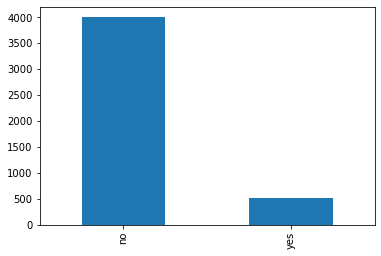

C:\Users\Mohua\Desktop\bits\Course Materials\Capstone\PCAM ZC321-C1-CODE-LOANAPPLICATION-G13\Dataset\LoanApplyData-bank.csv
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome      object
target        object
dtype: object
age          77
job           0
marital       0
education     0
default       0
balance       6
housing       0
loan          0
contact       0
day           0
month         0
duration      3
campaign      0
pdays         0
previous      0
poutcome      0
target        0
dtype: int64
age          1.703163
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.132714
housing      0.000000
loan         0.000000
contact      0.000000
day          0.000000


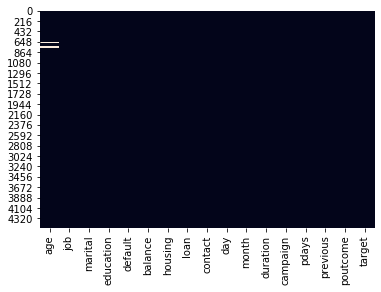

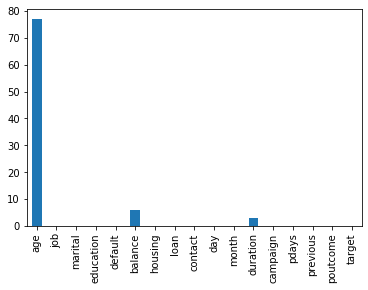

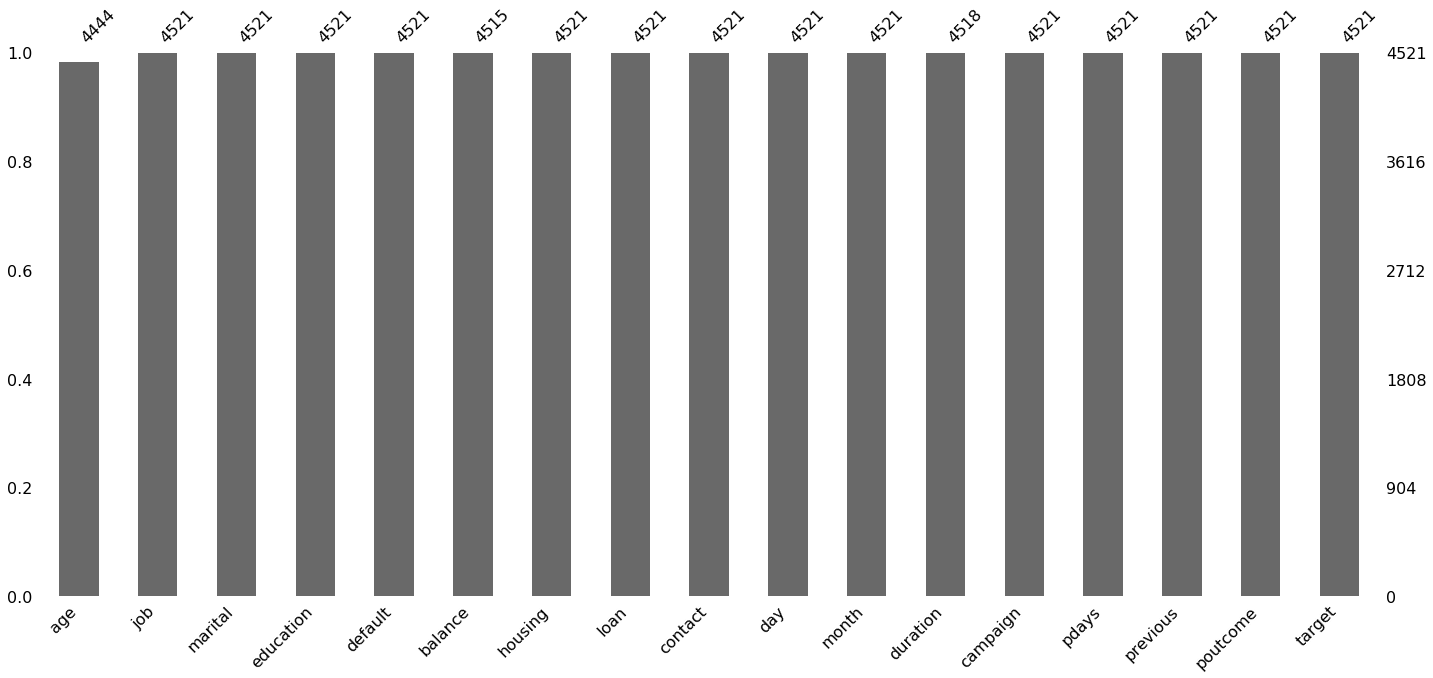

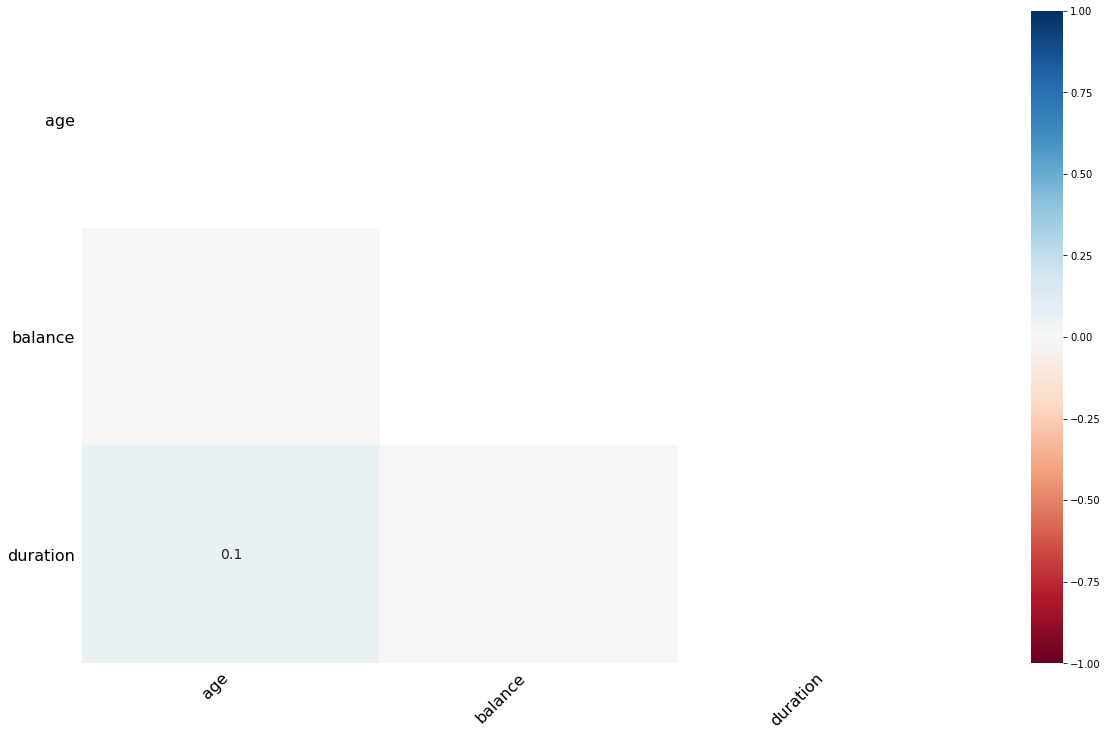

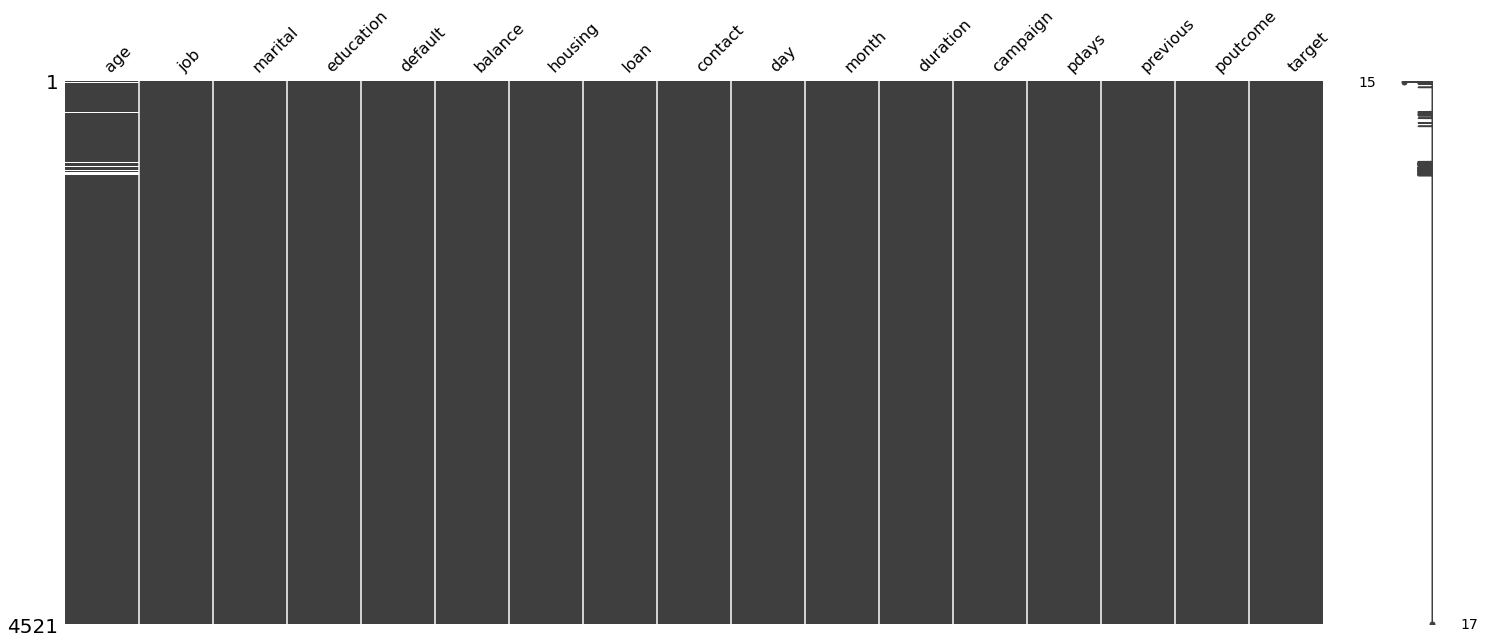

(4521, 17)
(4521, 17)
-------------Missing data imputation by MICE---------
        age            job  marital  education default      balance housing  \
0     30.0     unemployed  married    primary      no  1190.918838      no   
1     33.0       services  married  secondary      no  4789.000000     yes   
2     35.0     management   single   tertiary      no  1350.000000     yes   
3     30.0     management  married   tertiary      no  1476.000000     yes   
4     59.0    blue-collar  married  secondary      no     0.000000     yes   
...    ...            ...      ...        ...     ...          ...     ...   
4516  33.0       services  married  secondary      no  -333.000000     yes   
4517  57.0  self-employed  married   tertiary     yes -3313.000000     yes   
4518  57.0     technician  married  secondary      no   295.000000      no   
4519  28.0    blue-collar  married  secondary      no  1137.000000      no   
4520  44.0   entrepreneur   single   tertiary      no  1136.00000

label encoded data        age            job  marital  education  default      balance  housing  \
0     30.0     unemployed  married    primary        0  1190.918838        0   
1     33.0       services  married  secondary        0  4789.000000        1   
2     35.0     management   single   tertiary        0  1350.000000        1   
3     30.0     management  married   tertiary        0  1476.000000        1   
4     59.0    blue-collar  married  secondary        0     0.000000        1   
...    ...            ...      ...        ...      ...          ...      ...   
4516  33.0       services  married  secondary        0  -333.000000        1   
4517  57.0  self-employed  married   tertiary        1 -3313.000000        1   
4518  57.0     technician  married  secondary        0   295.000000        0   
4519  28.0    blue-collar  married  secondary        0  1137.000000        0   
4520  44.0   entrepreneur   single   tertiary        0  1136.000000        1   

      loan  contact 


----------Logistic Regression---------------


----------Random Forest---------------


----------SVM---------------


----------Multinomial Naive Bayes---------------


----------XGBoost---------------

Accuracy:  77.45025792188652
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      1197
           1       0.34      0.93      0.49       160

    accuracy                           0.77      1357
   macro avg       0.66      0.84      0.67      1357
weighted avg       0.91      0.77      0.81      1357

Training Set Score:  86.04998931852168
Testing Set Score:  77.45025792188652
[[902 295]
 [ 11 149]]


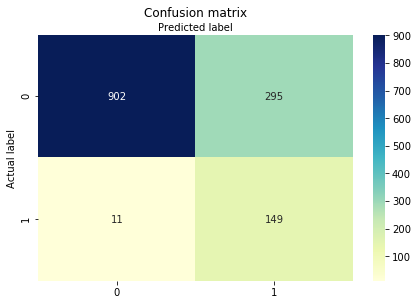


----------Neural Network---------------



In [77]:
def main():
        if __name__ == '__main__':
            main()

data = PreProcessor.getData()
PreProcessor.show_stats(data)
#Datacategoricaldata = PreProcessor().getCategoricalCols(data)
#categoricaldata = PreProcessor().getNumericData(data)
cat_columns = PreProcessor.get_categorical_columns(data)
loandata = PreProcessor.convertCategorical(cat_columns)
#numericToCategoryData = PreProcessor().convertNumericToCategory(loandata)
MissingValue.find_missing_value(loandata)
MissingValue.missingvalue_plot(loandata)
#MissingValue.impute_missing_value_by_mean(loandata)
#MissingValue.impute_missing_value_by_median(loandata)
#imputed_data=MissingValue.impute_missing_value_by_knn(data)
imputed_data=MissingValue.impute_missing_value_Mice(loandata)
#numericData = PreProcessor().getNumericData(imputed_data)
numericCols = PreProcessor().geNumericCols(imputed_data)
final_cat_cols=PreProcessor.get_categorical_columns(imputed_data)
#Outlier.detect_outlier_by_iqr(imputed_data)
#Outlier.detect_outlier_by_zscore(imputed_data)
#Outlier.visualize_outliers_univariate(imputed_data)
#Outlier.visualize_outlier_kmeans(imputed_data)
#Outlier.visualize_outlier_dbscan(imputed_data)
#Encoding.label_encoder(imputed_data,cat_columns)
#encoded_data=Encoding.one_hot_encoder(imputed_data,cat_columns)
#Scaling.scale_min_max(imputed_data)
#binData=Feature_Engg().createBin(imputed_data,numericCols)
#pctdata=Feature_Engg().createCategoryPct(binData,final_cat_cols)
#Visualize.visualize_categorical_bivariate(loandata)  #bar graphs
#Visualize.find_categorical_column_mean(loandata)
#Visualize.visualize_correlation(numericToCategoryData,numericCols) #pairplot correlations between numeric columns
#Visualize().Bar_Graphs(pctdata) #bargraphs on binned data
#Visualize().Facet_Grid(pctdata) #balance vs duration for marital status
###several graphs###Visualize().Visualize_strip_plot(final_cat_cols,numericCols,loandata)
#Visualize().boxPlot(imputed_data, numericCols,final_cat_cols)
#Visualize().violinPlot(imputed_data, numericCols,final_cat_cols)
##Visualize().PairPlot_hue(pctdata, numericCols)
##Visualize().KDE_plot(pctdata)
#Visualize().Point_plot(pctdata)
fe_data=Feature_Engg.Feature_engineering_numeric(imputed_data) #for XGBoost
fe_data_numeric = Feature_Engg.FE_Only_Numeric(imputed_data)  #for neural_network
#response = 'target'
#pca_data=pca().init_pca(fe_data,cat_columns,response)
x_train_res, X_test, y_train_res, y_test=Test_Train_Split().train_test_split_smote(fe_data) #for xgboost
#x_train_res, X_test, y_train_res, y_test=Test_Train_Split().train_test_raw_split_smote(imputed_data)
#x_train_res, X_test, y_train_res, y_test=Test_Train_Split().train_test_pca_split_smote(pca_data)
#x_train_res_nn, X_test_nn, y_train_res_nn, y_test_nn=Test_Train_Split().train_test_split_nn_smote(fe_data_numeric)
print ("\n----------Logistic Regression---------------\n")
#Logistic_Regression().log_reg_model(x_train_res, X_test, y_train_res, y_test)
print ("\n----------Random Forest---------------\n")
#Random_Forest().Randomforest_raw(x_train_res_nn, X_test_nn, y_train_res_nn, y_test_nn)
print ("\n----------SVM---------------\n")
#SVM().SVM_model(x_train_res, X_test, y_train_res, y_test)
#NaiveBayes().guassianNB(x_train_res, X_test, y_train_res, y_test)
print ("\n----------Multinomial Naive Bayes---------------\n")
#NaiveBayes().multinomialNB(x_train_res, X_test, y_train_res, y_test)
print ("\n----------XGBoost---------------\n")
#XGBOOST().XGBOOST_model(x_train_res, X_test, y_train_res, y_test)
XGBOOST().XGBOOST_model_direct(x_train_res, X_test, y_train_res, y_test)
print ("\n----------Neural Network---------------\n")
#NeuralNetwork().NeuralNetwork_model(x_train_res, X_test, y_train_res, y_test)
#NeuralNetwork().NeuralNetwork_model_direct(x_train_res_nn, X_test_nn, y_train_res_nn, y_test_nn)






